### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#Unificación de los Datos

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

print(df.shape)
df.head()

(9435, 13)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [4]:
facturacion = df.groupby("Tienda")["Precio"].sum().reset_index()
facturacion.columns = ["Tienda", "Facturación Total"]
facturacion = facturacion.sort_values("Facturación Total", ascending=False)

print(facturacion.to_string(index=False))

  Tienda  Facturación Total
Tienda 1       1150880400.0
Tienda 2       1116343500.0
Tienda 3       1098019600.0
Tienda 4       1038375700.0


In [5]:
ingreso_tienda1 = tienda1["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

print("💰 Facturación total por tienda:")
print(f"  Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"  Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"  Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"  Tienda 4: ${ingreso_tienda4:,.2f}")


tiendas = {
    "Tienda 1": ingreso_tienda1,
    "Tienda 2": ingreso_tienda2,
    "Tienda 3": ingreso_tienda3,
    "Tienda 4": ingreso_tienda4
}

mejor = max(tiendas, key=tiendas.get)
peor = min(tiendas, key=tiendas.get)

print(f"\n✅ Mayor facturación: {mejor} (${tiendas[mejor]:,.2f})")
print(f"❌ Menor facturación: {peor}  (${tiendas[peor]:,.2f})")

💰 Facturación total por tienda:
  Tienda 1: $1,150,880,400.00
  Tienda 2: $1,116,343,500.00
  Tienda 3: $1,098,019,600.00
  Tienda 4: $1,038,375,700.00

✅ Mayor facturación: Tienda 1 ($1,150,880,400.00)
❌ Menor facturación: Tienda 4  ($1,038,375,700.00)


# 2. Ventas por categoría

In [6]:
ventas_categoria = df.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum().reset_index()
ventas_categoria.columns = ["Tienda", "Categoría", "Total Ventas"]
ventas_categoria = ventas_categoria.sort_values(["Tienda", "Total Ventas"], ascending=[True, False])

print(ventas_categoria.to_string(index=False))

  Tienda               Categoría  Total Ventas
Tienda 1            Electrónicos   429493500.0
Tienda 1       Electrodomésticos   363685200.0
Tienda 1                 Muebles   187633700.0
Tienda 1  Instrumentos musicales    91299000.0
Tienda 1    Deportes y diversión    39290000.0
Tienda 1                Juguetes    17995700.0
Tienda 1 Artículos para el hogar    12698400.0
Tienda 1                  Libros     8784900.0
Tienda 2            Electrónicos   410831100.0
Tienda 2       Electrodomésticos   348567800.0
Tienda 2                 Muebles   176426300.0
Tienda 2  Instrumentos musicales   104990300.0
Tienda 2    Deportes y diversión    34744500.0
Tienda 2                Juguetes    15945400.0
Tienda 2 Artículos para el hogar    14746900.0
Tienda 2                  Libros    10091200.0
Tienda 3            Electrónicos   410775800.0
Tienda 3       Electrodomésticos   329237900.0
Tienda 3                 Muebles   201072100.0
Tienda 3  Instrumentos musicales    77380900.0
Tienda 3    D

In [7]:
for nombre, tienda in [("Tienda 1", tienda1), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]:
    print(f"\n{'='*45}")
    print(f"  📦 {nombre} - Ventas por Categoría")
    print(f"{'='*45}")

    categoria = tienda["Categoría del Producto"].value_counts().reset_index()
    categoria.columns = ["Categoría", "Cantidad Vendida"]

    for _, row in categoria.iterrows():
        print(f"  {row['Categoría']:<30} {row['Cantidad Vendida']} ventas")

    print(f"\n  ⭐ Más popular:  {categoria.iloc[0]['Categoría']} ({categoria.iloc[0]['Cantidad Vendida']} ventas)")
    print(f"  📉 Menos popular: {categoria.iloc[-1]['Categoría']} ({categoria.iloc[-1]['Cantidad Vendida']} ventas)")


  📦 Tienda 1 - Ventas por Categoría
  Muebles                        465 ventas
  Electrónicos                   448 ventas
  Juguetes                       324 ventas
  Electrodomésticos              312 ventas
  Deportes y diversión           284 ventas
  Instrumentos musicales         182 ventas
  Libros                         173 ventas
  Artículos para el hogar        171 ventas

  ⭐ Más popular:  Muebles (465 ventas)
  📉 Menos popular: Artículos para el hogar (171 ventas)

  📦 Tienda 2 - Ventas por Categoría
  Muebles                        442 ventas
  Electrónicos                   422 ventas
  Juguetes                       313 ventas
  Electrodomésticos              305 ventas
  Deportes y diversión           275 ventas
  Instrumentos musicales         224 ventas
  Libros                         197 ventas
  Artículos para el hogar        181 ventas

  ⭐ Más popular:  Muebles (442 ventas)
  📉 Menos popular: Artículos para el hogar (181 ventas)

  📦 Tienda 3 - Ventas por Cat

# 3. Calificación promedio de la tienda


In [8]:
calificacion = df.groupby("Tienda")["Calificación"].mean().reset_index()
calificacion.columns = ["Tienda", "Calificación Promedio"]
calificacion["Calificación Promedio"] = calificacion["Calificación Promedio"].round(2)
calificacion = calificacion.sort_values("Calificación Promedio", ascending=False)

print(calificacion.to_string(index=False))

  Tienda  Calificación Promedio
Tienda 3                   4.05
Tienda 2                   4.04
Tienda 4                   4.00
Tienda 1                   3.98


In [9]:
print("⭐ Calificación promedio por tienda:")
print(f"{'='*45}")

calificaciones = {}

for nombre, tienda in [("Tienda 1", tienda1), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]:
    promedio = tienda["Calificación"].mean()
    calificaciones[nombre] = round(promedio, 2)

    estrellas = "⭐" * round(promedio)
    print(f"  {nombre}: {promedio:.2f} / 5.00  {estrellas}")

print(f"{'='*45}")

mejor = max(calificaciones, key=calificaciones.get)
peor = min(calificaciones, key=calificaciones.get)

print(f"\n✅ Mejor calificada:  {mejor} ({calificaciones[mejor]})")
print(f"❌ Peor calificada:   {peor} ({calificaciones[peor]})")

⭐ Calificación promedio por tienda:
  Tienda 1: 3.98 / 5.00  ⭐⭐⭐⭐
  Tienda 2: 4.04 / 5.00  ⭐⭐⭐⭐
  Tienda 3: 4.05 / 5.00  ⭐⭐⭐⭐
  Tienda 4: 4.00 / 5.00  ⭐⭐⭐⭐

✅ Mejor calificada:  Tienda 3 (4.05)
❌ Peor calificada:   Tienda 1 (3.98)


# 4. Productos más y menos vendidos

In [10]:
for tienda in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]:
    subset = df[df["Tienda"] == tienda]["Producto"].value_counts()
    print(f"\n{'='*40}")
    print(f"  {tienda}")
    print(f"{'='*40}")
    print(f"  ✅ Más vendido:  {subset.index[0]}  ({subset.iloc[0]} unidades)")
    print(f"  ❌ Menos vendido: {subset.index[-1]}  ({subset.iloc[-1]} unidades)")


  Tienda 1
  ✅ Más vendido:  Microondas  (60 unidades)
  ❌ Menos vendido: Celular ABXY  (33 unidades)

  Tienda 2
  ✅ Más vendido:  Iniciando en programación  (65 unidades)
  ❌ Menos vendido: Juego de mesa  (32 unidades)

  Tienda 3
  ✅ Más vendido:  Kit de bancas  (57 unidades)
  ❌ Menos vendido: Bloques de construcción  (35 unidades)

  Tienda 4
  ✅ Más vendido:  Cama box  (62 unidades)
  ❌ Menos vendido: Guitarra eléctrica  (33 unidades)



  🏪 Tienda 1
  ✅ Top 5 más vendidos:
     • Microondas                          60 ventas
     • TV LED UHD 4K                       60 ventas
     • Armario                             60 ventas
     • Secadora de ropa                    58 ventas
     • Mesa de noche                       56 ventas

  ❌ Top 5 menos vendidos:
     • Auriculares con micrófono           33 ventas
     • Celular ABXY                        33 ventas
     • Olla de presión                     35 ventas
     • Pandereta                           36 ventas
     • Ciencia de datos con Python         39 ventas

  🏪 Tienda 2
  ✅ Top 5 más vendidos:
     • Iniciando en programación           65 ventas
     • Microondas                          62 ventas
     • Batería                             61 ventas
     • Guitarra acústica                   58 ventas
     • Pandereta                           58 ventas

  ❌ Top 5 menos vendidos:
     • Juego de mesa                       32 ventas
     • Impresora      

/tmp/ipython-input-3655646079.py:57: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3655646079.py:57: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


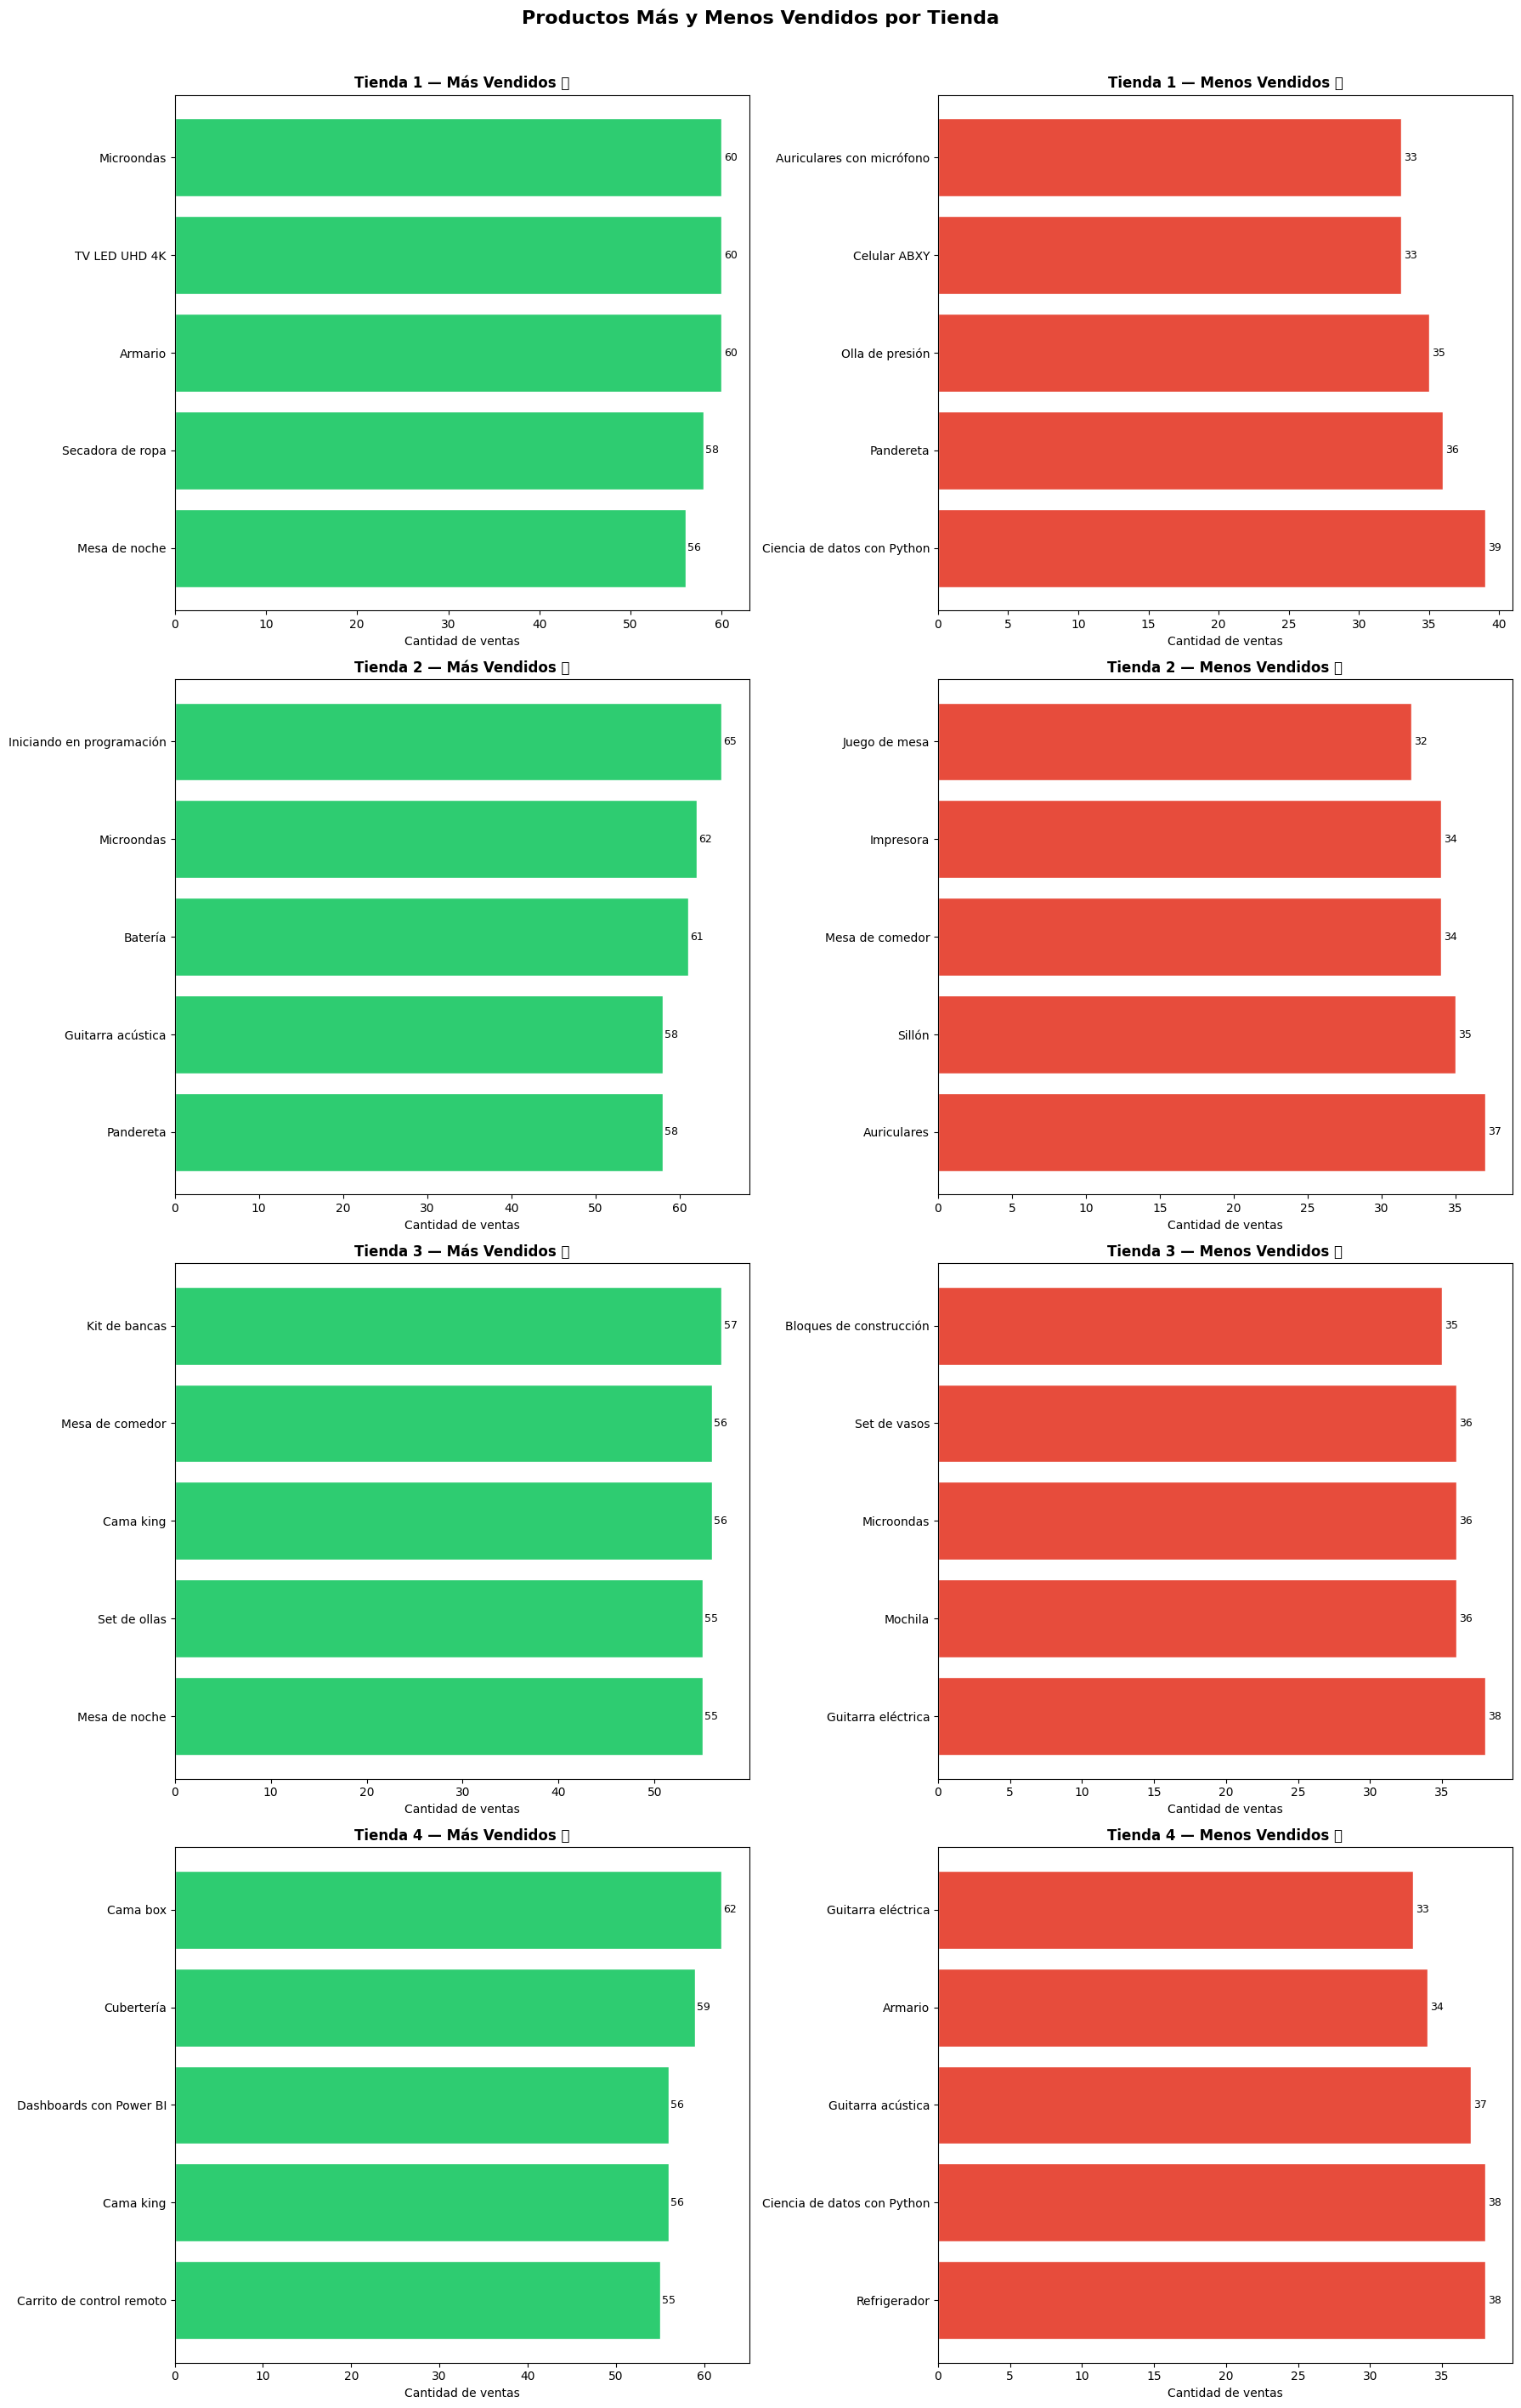

In [12]:
import matplotlib.pyplot as plt

tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

TOP_N = 5


for nombre, df in tiendas.items():
    conteo = df["Producto"].value_counts()

    print(f"\n{'='*50}")
    print(f"  🏪 {nombre}")
    print(f"{'='*50}")
    print(f"  ✅ Top {TOP_N} más vendidos:")
    for producto, cant in conteo.head(TOP_N).items():
        print(f"     • {producto:<35} {cant} ventas")

    print(f"\n  ❌ Top {TOP_N} menos vendidos:")
    for producto, cant in conteo.tail(TOP_N).sort_values().items():
        print(f"     • {producto:<35} {cant} ventas")


fig, axes = plt.subplots(4, 2, figsize=(18, 28))
fig.suptitle("Productos Más y Menos Vendidos por Tienda", fontsize=16, fontweight="bold", y=1.01)

for i, (nombre, df) in enumerate(tiendas.items()):
    conteo = df["Producto"].value_counts()

    mas_vendidos  = conteo.head(TOP_N)
    menos_vendidos = conteo.tail(TOP_N).sort_values()


    ax1 = axes[i][0]
    bars1 = ax1.barh(mas_vendidos.index, mas_vendidos.values, color="#2ecc71", edgecolor="white")
    ax1.set_title(f"{nombre} — Más Vendidos ✅", fontweight="bold")
    ax1.set_xlabel("Cantidad de ventas")
    ax1.invert_yaxis()
    for bar in bars1:
        ax1.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
                 f"{int(bar.get_width())}", va="center", fontsize=9)


    ax2 = axes[i][1]
    bars2 = ax2.barh(menos_vendidos.index, menos_vendidos.values, color="#e74c3c", edgecolor="white")
    ax2.set_title(f"{nombre} — Menos Vendidos ❌", fontweight="bold")
    ax2.set_xlabel("Cantidad de ventas")
    ax2.invert_yaxis()
    for bar in bars2:
        ax2.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
                 f"{int(bar.get_width())}", va="center", fontsize=9)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

🚚 Costo de envío promedio por tienda:
  Tienda 1: $26,018.61
  Tienda 2: $25,216.24
  Tienda 3: $24,805.68
  Tienda 4: $23,459.46

📈 Más caro:   Tienda 1 ($26,018.61)
📉 Más barato: Tienda 4 ($23,459.46)


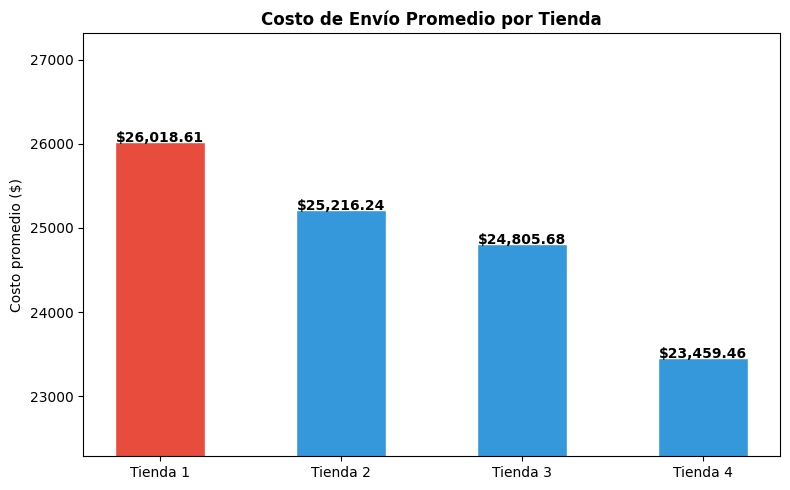

In [16]:
import matplotlib.pyplot as plt

tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

envios = {nombre: round(df["Costo de envío"].mean(), 2) for nombre, df in tiendas.items()}

print("🚚 Costo de envío promedio por tienda:")
for nombre, valor in envios.items():
    print(f"  {nombre}: ${valor:,.2f}")

print(f"\n📈 Más caro:   {max(envios, key=envios.get)} (${max(envios.values()):,.2f})")
print(f"📉 Más barato: {min(envios, key=envios.get)} (${min(envios.values()):,.2f})")

valores = list(envios.values())
nombres = list(envios.keys()) # Added this line to define 'nombres'
colores = ["#e74c3c" if v == max(valores) else "#3498db" for v in valores]

plt.figure(figsize=(8, 5))
bars = plt.bar(nombres, valores, color=colores, edgecolor="white", width=0.5)
plt.title("Costo de Envío Promedio por Tienda", fontweight="bold")
plt.ylabel("Costo promedio ($)")
plt.ylim(min(valores) * 0.95, max(valores) * 1.05)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f"${bar.get_height():,.2f}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

# Generando gráfico


/tmp/ipython-input-961484840.py:66: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-961484840.py:66: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-961484840.py:66: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-961484840.py:66: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-961484840.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from f

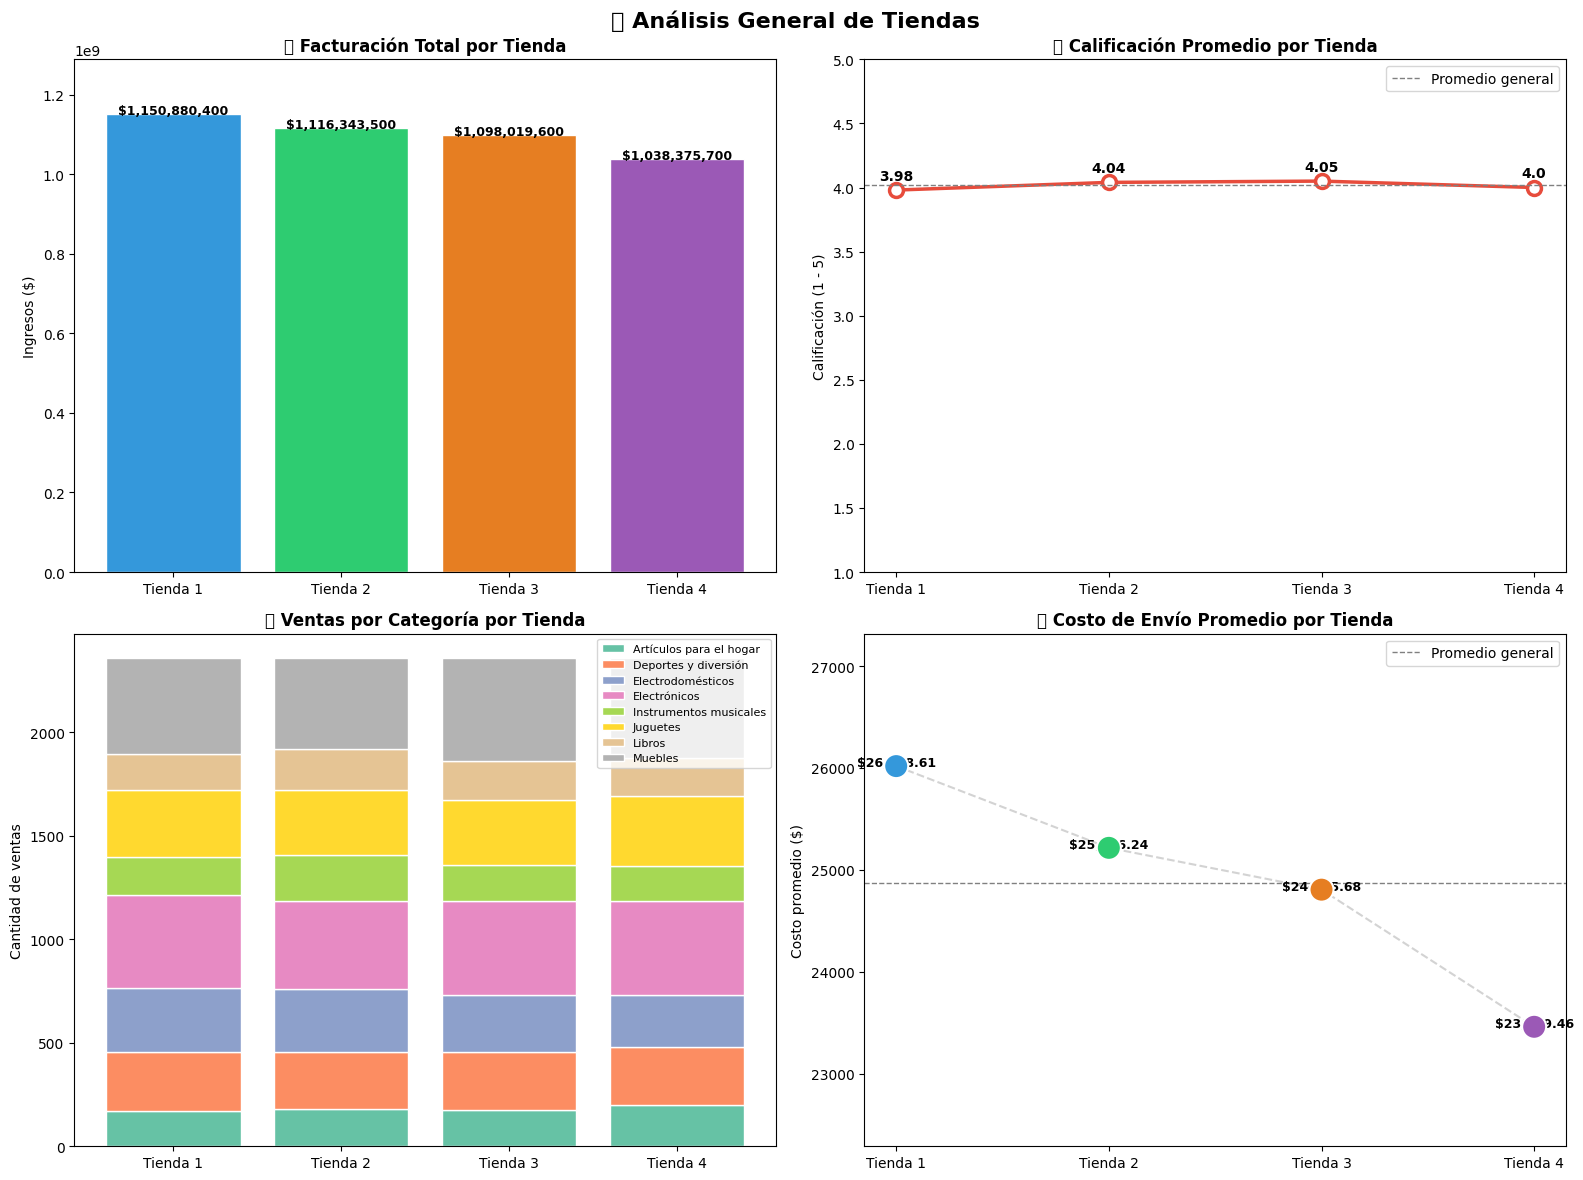

In [18]:
import matplotlib.pyplot as plt

tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

nombres = list(tiendas.keys())
colores = ["#3498db", "#2ecc71", "#e67e22", "#9b59b6"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("📊 Análisis General de Tiendas", fontsize=16, fontweight="bold")

ax1 = axes[0, 0]
facturacion = [tiendas[n]["Precio"].sum() for n in nombres]
bars = ax1.bar(nombres, facturacion, color=colores, edgecolor="white")
ax1.set_title("💰 Facturación Total por Tienda", fontweight="bold")
ax1.set_ylabel("Ingresos ($)")
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50000,
             f"${bar.get_height():,.0f}", ha="center", fontsize=9, fontweight="bold")
ax1.set_ylim(0, max(facturacion) * 1.12)

ax2 = axes[0, 1]
calificaciones = [round(tiendas[n]["Calificación"].mean(), 2) for n in nombres]
ax2.plot(nombres, calificaciones, marker="o", color="#e74c3c", linewidth=2.5,
         markersize=10, markerfacecolor="white", markeredgewidth=2.5)
ax2.set_title("⭐ Calificación Promedio por Tienda", fontweight="bold")
ax2.set_ylabel("Calificación (1 - 5)")
ax2.set_ylim(1, 5)
ax2.axhline(sum(calificaciones)/len(calificaciones), color="gray",
            linestyle="--", linewidth=1, label="Promedio general")
ax2.legend()
for i, val in enumerate(calificaciones):
    ax2.text(i, val + 0.08, str(val), ha="center", fontweight="bold")

ax3 = axes[1, 0]
categorias = sorted(tienda1["Categoría del Producto"].unique())
bottom = [0] * len(nombres)
palette = plt.cm.Set2.colors

for j, cat in enumerate(categorias):
    valores = [tiendas[n]["Categoría del Producto"].value_counts().get(cat, 0) for n in nombres]
    ax3.bar(nombres, valores, bottom=bottom, label=cat, color=palette[j % len(palette)], edgecolor="white")
    bottom = [bottom[k] + valores[k] for k in range(len(nombres))]

ax3.set_title("📦 Ventas por Categoría por Tienda", fontweight="bold")
ax3.set_ylabel("Cantidad de ventas")
ax3.legend(loc="upper right", fontsize=8)

ax4 = axes[1, 1]
envios = [round(tiendas[n]["Costo de envío"].mean(), 2) for n in nombres]
ax4.scatter(nombres, envios, s=300, color=colores, zorder=5, edgecolors="white", linewidths=1.5)
ax4.plot(nombres, envios, color="lightgray", linewidth=1.5, linestyle="--", zorder=1)
ax4.set_title("🚚 Costo de Envío Promedio por Tienda", fontweight="bold")
ax4.set_ylabel("Costo promedio ($)")
ax4.set_ylim(min(envios) * 0.95, max(envios) * 1.05)
ax4.axhline(sum(envios)/len(envios), color="gray", linestyle="--",
            linewidth=1, label="Promedio general")
ax4.legend()
for i, val in enumerate(envios):
    ax4.text(i, val + 0.2, f"${val:,.2f}", ha="center", fontweight="bold", fontsize=9)

plt.tight_layout()
plt.show()

#***Informe final***

#Análisis de tiendas

##Introducción

Este informe tiene como principal objetivo, analizar el desempeño de cuatro tiendas propiedad del Sr. Juan, con el fin de identificar aspectos determinates basados en 5 analisis específicos propuestos para tomar la determinación de cual de ellas representa la opción menos rentable y por tanto deberia el considerar para su venta.

Para timar una decición objetiva, se evaluaron fatores clave como lo son los ingresos totales, ventas por categoria, calificación promedio de los clientes, productos mas o menos vendidos y por último el costo de envío promedio por tienda.


In [22]:
import pandas as pd

tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

resumen = []

for nombre, df in tiendas.items():
    facturacion   = df["Precio"].sum()
    calificacion  = round(df["Calificación"].mean(), 2)
    envio         = round(df["Costo de envío"].mean(), 2)
    mas_vendido   = df["Producto"].value_counts().idxmax()
    menos_vendido = df["Producto"].value_counts().idxmin()
    cat_top       = df["Categoría del Producto"].value_counts().idxmax()

    resumen.append({
        "Tienda"           : nombre,
        "Facturación Total": f"${facturacion:,.2f}",
        "Calificación Prom": calificacion,
        "Envío Promedio"   : f"${envio:,.2f}",
        "Categoría Top"    : cat_top,
        "Producto + Vendido": mas_vendido,
        "Producto - Vendido": menos_vendido
    })

resumen_df = pd.DataFrame(resumen).set_index("Tienda")
print(resumen_df.to_string())

          Facturación Total  Calificación Prom Envío Promedio Categoría Top         Producto + Vendido         Producto - Vendido
Tienda                                                                                                                           
Tienda 1  $1,150,880,400.00               3.98     $26,018.61       Muebles                 Microondas  Auriculares con micrófono
Tienda 2  $1,116,343,500.00               4.04     $25,216.24       Muebles  Iniciando en programación              Juego de mesa
Tienda 3  $1,098,019,600.00               4.05     $24,805.68       Muebles              Kit de bancas    Bloques de construcción
Tienda 4  $1,038,375,700.00               4.00     $23,459.46       Muebles                   Cama box         Guitarra eléctrica


##Conclusiones:

###Facturación total:
La tienda 1 es superior a las otras tres respecto a los ingresos totales, dejando en el último lugar a la tienda 4 la cual registró la facturación más baja de todas, estoquiere decir, un mejor volumen de ventas o productos de menor cuantia frente a las otras 4.

###Ventas por categoría:
Lo más recurrente en todas la tiendas es que las categirías más representativas son las de electrónicos y electrodomésticos en terminos de mayores ingresos por ventas. Aun así, la tienda 4 tiene una distribución en las ventas más desigual teniendo categorías sin movimiento lo que representa un alcance comercial de productos un poco limitada.

###Calificación pormedio:
Las 4 tiendas mantienen calificaciones similares lo cual representa una experiencia de cliente homogénea o similar y no destaca ninguna en forma negativa de forma significativa para ser un factor representativo dentro de la decisión.

###Productos más y menos vendidos:
En las 4 tiendas son más variados pero en la tienda 4 se hace evidente la una oferta menos diversificada pues hay categorías de productos sin movimiento, es decir, la tienda depende de la venta de algunos articulos espcíficos.

###Costo promedio de envio:
Las 4 tiendas no difieren mucho en terminos de costo de envios, digamos que su diferencia no es significativa, pero si se hace evidente que la tienda 4 dada su bajo nivel de ingresos por ventas y su menor costo de envio no representa de esta forma una ventaja competitiva frente a las otras 3 tiendas.

##Recomendación:

Tras evaluar estos 5 factores analizados, mi recomendación para el Sr. Juan sería; considerar vender la Tienda  4 por las siguientes razones:

- Tiene la menor factriración de las 4 tiendas.
- Distribución de las categorías desigual, poca diversificación en las ventas.
- Mayor dependencia a ventas de productos específicos, lo que podria representar riesgo comercial futuro.
- No tiene ventajas competitivas en las ventas y aunque tiene el menor costo promedio de envios y la mejor calificación promedio, no se justifica mantenerla frente al ejercicio de las demas tiendas.

Las tiendas 1 2 y 3 demuestran mayor solidez en terminos de ingresos, diversificación en ventas de sus productos por categorías y un mayor volúmen de ventas, por lo que desde mi opinión representan activos de mayor valor para el negocio del Sr. Juan.